## Assignment: Group–Project 
**ITE 351: AI & Applications**

<u>**Group members:**</u>

[TODO]

The recommended format is the following:\
Title of your project\
Members: Name1, Department, University, Email\
Name2, Department, University, Email\
I. Introduction\
- Motivation: Why are you doing this?\
- What do you want to see at the end?\
II. Datasets\
- Describing your dataset\
III. Methodology\
- Explaining your choice of algorithms (methods)\
- Explaining features or code (if any)\
IV. Evaluation & Analysis\
- Graphs, tables, any statistics (if any)\
V. Related Work (e.g., existing studies)\
- Tools, libraries, blogs, or any documentation that you have used to do this project.\
VI. Conclusion: Discussion\

## Introduction

## Dataset

In [5]:
#Loading the csv file and get data
import pandas as pd
data = pd.DataFrame()
path_datas = '../Datasets/Original/TSLA.csv'
trade_data = pd.read_csv(path_datas ,sep = ',',)
trade_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [ ]:
#
columns_names = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Kopie des DataFrames erstellen
modified_trade_data = trade_data.copy()
t_previous_days = 30

for attribute in columns_names:
    for i in range(1, t_previous_days + 1):
        deviation_col_name = f'deviation_{attribute}_{i}'
        modified_trade_data[deviation_col_name] = modified_trade_data[attribute] - modified_trade_data[attribute].shift(i)
        
        average_deviation_col_name = f'average_deviation_{attribute}'
        modified_trade_data[average_deviation_col_name] = modified_trade_data[[f'deviation_{attribute}_{j}' for j in range(1, i + 1)]].mean(axis=1)

    positive_deviation_col_name = f'positive_deviations_{attribute}'
    modified_trade_data[positive_deviation_col_name] = 0
    for i in range(1, t_previous_days + 1):
        modified_trade_data[positive_deviation_col_name] += (modified_trade_data[f'deviation_{attribute}_{i}'] > 0).astype(int)

    negative_deviation_col_name = f'negative_deviations_{attribute}'
    modified_trade_data[negative_deviation_col_name] = 0
    for i in range(1, t_previous_days + 1):
        modified_trade_data[negative_deviation_col_name] += (modified_trade_data[f'deviation_{attribute}_{i}'] < 0).astype(int)

for i in range(1, t_previous_days + 1):
    diff_col_name_open_close = f'difference_open_close_{i}'
    modified_trade_data[diff_col_name_open_close] = modified_trade_data['Open'] - modified_trade_data['Close'].shift(i)
    

    diff_col_name = f'difference_high_low_{i}'
    modified_trade_data[diff_col_name] = modified_trade_data[attribute] - modified_trade_data[attribute].shift(i)

average_diff_col_name = f'average_difference_high_low'
modified_trade_data[average_diff_col_name] = modified_trade_data[diff_col_name].rolling(window=t_previous_days).mean()
average_diff_col_name_open_close = f'average_difference_open_close'
modified_trade_data[average_diff_col_name_open_close] = modified_trade_data[diff_col_name_open_close].rolling(window=t_previous_days).mean()


modified_trade_data.dropna(inplace=True)
modified_trade_data.head()


In [12]:
column_names = modified_trade_data.columns.tolist()
t_label_days = 10
modified_trade_data.dropna(inplace=True)

deviation_values = []
for i in range(1, t_label_days + 1):
    deviation_col_name = f'deviation_{i}'
    modified_trade_data[deviation_col_name] = modified_trade_data['Low'].diff(i)
    deviation_values.append(modified_trade_data[deviation_col_name])


average_deviation = sum(deviation_values) / t_label_days

modified_trade_data['Label'] = 0  # Initialisierung aller Labels als 0
modified_trade_data = modified_trade_data[t_label_days:]
average_deviation= average_deviation[t_label_days:]


for index, deviation_value in average_deviation.items():
    
    if deviation_value < 0:
        modified_trade_data.loc[index, 'Label'] = 0
    else:
        modified_trade_data.loc[index, 'Label'] = 1

modified_trade_data.head(20)

modified_trade_data.to_csv('modifierd_trade_data.csv', index=False)




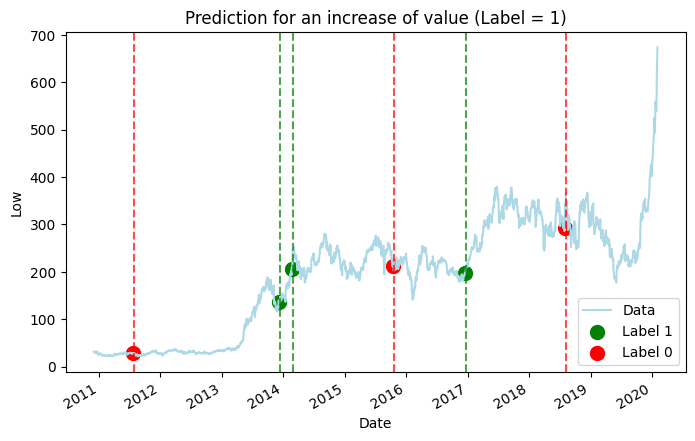

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df = modified_trade_data.copy()

# Umwandlung der 'Date'-Spalte in ein Datumsformat
df['Date'] = pd.to_datetime(df['Date'])

# Zufällige Auswahl von 3 Datenpunkten mit Label 1 und 0
label_1_points = df[df['Label'] == 1].sample(n=3)
label_0_points = df[df['Label'] == 0].sample(n=3)

plt.figure(figsize=(8, 5))

# Plot der Datenreihe
plt.plot(df['Date'], df['Low'], label='Data', color='lightblue')

# Scatter-Plot für Label 1 und Label 0
plt.scatter(label_1_points['Date'], label_1_points['Low'], color='green', label='Label 1', s=100)
plt.scatter(label_0_points['Date'], label_0_points['Low'], color='red', label='Label 0', s=100)

# Berechnung und Zeichnung der vertikalen Linien 150 Tage nach jedem Punkt
for idx, point in label_1_points.iterrows():
    plt.axvline(point['Date'] + pd.Timedelta(days=t_label_days), color='green', linestyle='--', alpha=0.7)
    
for idx, point in label_0_points.iterrows():
    plt.axvline(point['Date'] + pd.Timedelta(days=t_label_days), color='red', linestyle='--', alpha=0.7)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Low')
plt.title('Prediction for an increase of value (Label = 1)')

# Setze Achsenbeschriftung auf jährliche Intervalle
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.gcf().autofmt_xdate()

plt.show()


## Methodology

In [ ]:
!pip install seaborn


In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


features = modified_trade_data.iloc[:, 1:-1]
labels = modified_trade_data['Label']  # Das Label, das vorhergesagt werden soll
# Teile den Datensatz in Trainings- und Testdaten auf
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


decision_tree_model_sklearn = DecisionTreeClassifier()

decision_tree_model_sklearn.fit(X_train, y_train)

y_pred_decision_tree_sklearn = decision_tree_model_sklearn.predict(X_test)

# Evaluierung der Vorhersagegenauigkeit
accuracy_decision_tree_sklearn = metrics.accuracy_score(y_test, y_pred_decision_tree_sklearn)
print("Accuracy:", accuracy_decision_tree_sklearn)

Accuracy: 0.9391424619640387


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# features = modified_trade_data.iloc[:, 1:-1]
# labels = modified_trade_data['Label']  

# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Build model and train(fit) it
random_forest_model_sklearn = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest_model_sklearn.fit(X_train, y_train)

# Test model by predicting based on the test data
y_pred_random_forest_sklearn = random_forest_model_sklearn.predict(X_test)

# Evaluation and calculaction of the accuracy
accuracy_random_forest_sklearn = accuracy_score(y_test, y_pred_random_forest_sklearn)
print("Accuracy:", accuracy_random_forest_sklearn)



Accuracy: 0.9612724757952974


### Models written in scratch

### Decision Tree written in scratch

In [ ]:
import numpy as np
import pandas as pd

class Tree_Node():
    def __init__(self, feature_index=None, threshold=None, branch_1=None, branch_2=None, improvment=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.branch_1 = branch_1
        self.branch_2= branch_2
        self.improvment = improvment
        self.value = value

class DecisionTree():
    def __init__(self, min_datas_branching=7, max_depth=10):
        self.root = None        
        self.min_datas_branching = min_datas_branching
        self.max_depth = max_depth
        
    def create_tree(self, dataset, curr_depth=0):
        data = dataset[:,:-1]
        label = dataset[:,-1]
        number_of_datas, number_of_features = np.shape(data)
        
        if number_of_datas>self.min_datas_branching and curr_depth<=self.max_depth and number_of_datas > number_of_features:
            best_branching = self.get_best_branching(dataset, number_of_datas, number_of_features)

            if best_branching["improvment"]>0: #if ==0, the node only consists of one type of class
                branch_1_subtree = self.create_tree(best_branching["dataset_branch_1"], curr_depth+1)
                branch_2_subtree = self.create_tree(best_branching["dataset_branch_2"], curr_depth+1)
                return Tree_Node(best_branching["feature_index"], best_branching["threshold"], branch_1_subtree, branch_2_subtree, best_branching["improvment"])
        
        leaf_value = self.calculate_leaf_value(label)
        return Tree_Node(value=leaf_value)
    
    def get_best_branching(self, dataset, number_of_datas, number_of_features):
        best_branching = {}
        max_improvment = -float("inf") 

        for feature_index in range(number_of_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_branch_1, dataset_branch_2= self.branch_tree(dataset, feature_index, threshold)
                if len(dataset_branch_1)>0 and len(dataset_branch_2)>0:
                    label, label_branch_1, label_branch_2 = dataset[:, -1], dataset_branch_1[:, -1], dataset_branch_2[:, -1]
                    new_improvment = self.information_gain(label, label_branch_1, label_branch_2, "gini")
                    if new_improvment>max_improvment:
                        best_branching["feature_index"] = feature_index
                        best_branching["threshold"] = threshold
                        best_branching["dataset_branch_1"] = dataset_branch_1
                        best_branching["dataset_branch_2"] = dataset_branch_2
                        best_branching["improvment"] = new_improvment
                        max_improvment = new_improvment
        return best_branching
    
    def branch_tree(self, dataset, feature_index, threshold):
        dataset_branch_1 = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_branch_2= np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_branch_1, dataset_branch_2
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        weight_branch_a = len(l_child) / len(parent)
        weight_branch_b = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_branch_a*self.gini_index(l_child) + weight_branch_b*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_branch_a*self.entropy(l_child) + weight_branch_b*self.entropy(r_child))
        return gain
    
    def entropy(self, y):        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):     
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, label):
        label = list(label)
        return max(label, key=label.count)
    
    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root

        if tree.value is not None:
            i = 0
        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.improvment)
            print("%sbranch_1:" % (indent), end="")
            self.print_tree(tree.branch_1, indent + indent)
            print("%sbranch_2:" % (indent), end="")
            self.print_tree(tree.branch_2, indent + indent)
    
    def fit(self, data, label):
        label_array = label.reshape(-1, 1)
        dataset = np.concatenate((data, label_array), axis=1)

        self.root = self.create_tree(dataset)
    
    def predict(self, data): 
        preditions = [self.make_prediction(x, self.root) for x in data]
        return preditions
    
    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value
        
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.branch_1)
        else:
            return self.make_prediction(x, tree.branch_2)


In [ ]:

features = modified_trade_data.iloc[:, 1:-1].values

labels = modified_trade_data.iloc[:, -1].values.reshape(-1,1)
labels = modified_trade_data['Label']

X_train, X_test, y_train, y_test_scratch_dt = train_test_split(features, labels, test_size=0.9, random_state=42)




decision_tree_model_scratch = DecisionTree(min_datas_branching=2, max_depth=1)
y_train = y_train.to_numpy()
decision_tree_model_scratch.fit(X_train,y_train)

decision_tree_model_scratch.fit(X_train,y_train)
y_pred_decision_tree_scratch = decision_tree_model_scratch.predict(X_test)
accuracy_decision_tree_scratch = metrics.accuracy_score(y_test_scratch_dt, y_pred_decision_tree_scratch)
print("Accuracy:", accuracy_decision_tree_scratch)





Accuracy: 0.8782287822878229


### random forest scratch

In [ ]:
import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=5, max_depth=2, min_datas_branching=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_datas_branching=min_datas_branching
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_datas_branching=self.min_datas_branching)
            X_sample, y_sample = self.samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def samples(self, X, y):
        n_samples = X.shape[0]
        label_samples = y.to_numpy()
        index = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[index], label_samples[index]
    
    def identify_most_common(self, y):
        counter = Counter(y)
        most_common_prediction = counter.most_common(1)[0][0]
        return most_common_prediction

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self.identify_most_common(pred) for pred in tree_preds])
        return predictions

In [ ]:

features = modified_trade_data.iloc[:, 1:-1].values
labels = modified_trade_data.iloc[:, -1].values.reshape(-1,1)
labels = modified_trade_data['Label']
X_train, X_test, y_train, y_test_scratch_rf = train_test_split(features, labels, test_size=0.9, random_state=42)
random_forest_model_scratch = RandomForest()
random_forest_model_scratch.fit(X_train,y_train)
y_pred_random_forest_scratch = random_forest_model_scratch.predict(np.array(X_test))
accuracy_random_forest_scratch = metrics.accuracy_score(y_test_scratch_rf, y_pred_random_forest_scratch)
print("Accuracy:", accuracy_random_forest_scratch)

Accuracy: 0.8805350553505535


## Evaluation & Analysis

### Accuracys

In [ ]:
print("Accuracy from Decision Tree: ", accuracy_decision_tree_sklearn)
print("Accuracy from Random Forest: ", accuracy_random_forest_sklearn)

Accuracy from Decision Tree:  0.9391424619640387
Accuracy from Random Forest:  0.9612724757952974


In [ ]:
print("Accuracy from Decision Tree coded in scratch: ", accuracy_decision_tree_scratch)
print("Accuracy from Random Forest coded in scratch: ", accuracy_random_forest_scratch)

Accuracy from Decision Tree coded in scratch:  0.8782287822878229
Accuracy from Random Forest coded in scratch:  0.8805350553505535


### ROC

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc(label, Y_test, Y_pred):
    fpr, tpr, _ =  roc_curve(Y_test, Y_pred)
    plt.plot(fpr,tpr, label=label)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

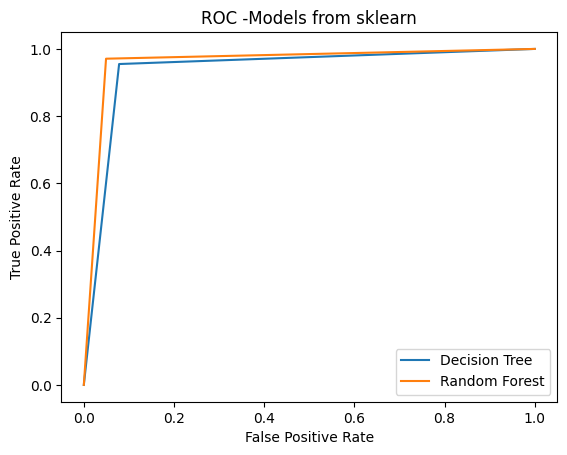

In [ ]:
plot_roc('Decision Tree', y_test, y_pred_decision_tree_sklearn)
plot_roc('Random Forest', y_test, y_pred_random_forest_sklearn)
plt.legend()
plt.title('ROC -Models from sklearn')
plt.show()

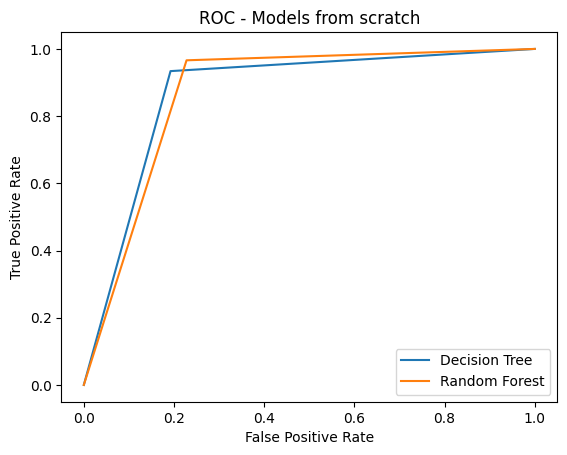

In [ ]:
plot_roc('Decision Tree', y_test_scratch_dt, y_pred_decision_tree_scratch)
plot_roc('Random Forest', y_test_scratch_rf, y_pred_random_forest_scratch)
plt.legend()
plt.title('ROC - Models from scratch')
plt.show()